# Problem Set 6 Code

In [68]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 9.6

In [123]:
def steepdescquad(Q, b, c, x_0, tol=1e-6, maxiter=1000):
    '''
    Function uses the steepest descent method to minimize the quadratic form
    1/2 x^T Q x - b^T x + c.
    Inputs are Q an "nxn", b an "n", c a scalar, and x_0 an "n" initial guess.
    
    Continues
    '''
    Df = lambda x: .5 * x.T @ (Q.T + Q) + b.T #Fix
    norm = 500
    x = x_0
    itr = 0
    while (itr < maxiter) and (norm > tol):
        #print("x beginning:", x)
        alpha = (Df(x) @ Df(x).T) / (Df(x) @ Q @ Df(x).T)
        xnext = x - alpha * Df(x).T
        x = np.copy(xnext)
        itr += 1
        norm = np.linalg.norm(Df(x))
    func = .5 * (x.T @ Q @ x) - b.T @ x + c 
    return x, func
    
    

In [124]:
#test
Q = np.array([[2, 1],[1,2]])
b = np.array([-2, 1])
c = 0
x_0 = np.array([23, 7])

minimizer = steepdescquad(Q, b, c, x_0)
minimizer

(array([ 1.66666695, -1.33333322]), 7.000000905444772)

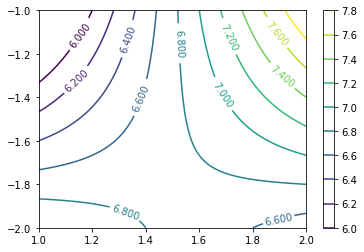

In [130]:
xgrid = np.linspace(1, 2, 100)
ygrid = np.linspace(-2, -1, 100)

X, Y = np.meshgrid(xgrid, ygrid)

def fxy(x, y):
    vec = np.array([x, y])
    out = .5 * (vec.T @ Q @ vec) - b.T @ vec + c
    return out

fs = fxy(xgrid, ygrid)

levels = np.linspace(6, 8, 11)
CS = plt.contour(X, Y, fs, levels = levels, cmap='viridis')
plt.clabel(CS, inline=1, fontsize=10)
plt.colorbar()

In [131]:

def steepest_descent (x0, b, Q, episilon=1e-6):
    Df = lambda x: (1/2) * np.dot(x.T, Q.T + Q) - b.T 
    i = 0
    max_iter = 1000
    D = 1
    
    while i < max_iter and D > episilon:
        i += 1
        x1 = np.copy(x0)
        x0 = (np.outer(Df(x1), Df(x1).T))/(np.dot(Df(x1, Q), Df(x1).T))
        D = np.abs(x0)
        
    return x1

In [132]:
steepestdescent(x_0, Q, b)

NameError: name 'steepestdescent' is not defined